### ML2 GRADED ASSESSMENT

### 1.	Data Understanding (5 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print thenumber of rows, cols and types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)

d.	Check for defects in the data such as missing values, outliers, etc and also check for class imbalance. (2 marks)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

In [14]:
data = pd.read_csv('sl_data.csv')

In [15]:
# removing id and unnamed: 32 column which is not necessary for our model
data = data.drop(['Patient_ID'],axis = 1)

##### b.	Calculate five-point summary for numerical variables (1 MARK)

In [16]:
data.dropna(inplace=True)

In [17]:
# Mapping our target variable to 1 and 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Skin_treatment'] = le.fit_transform(data['Skin_treatment'])

In [18]:
data.Skin_treatment.value_counts(normalize=True)

Skin_treatment
0    0.633634
1    0.366366
Name: proportion, dtype: float64

In [19]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
stand_scale = data.drop(['Skin_treatment'],axis = 1)
col_trans = make_column_transformer(
            (StandardScaler(), stand_scale.columns),
            remainder = 'passthrough')

##### d.	Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop(['Skin_treatment'], axis = 1)
y = data['Skin_treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
col_trans.fit_transform(X_train)

array([[-0.66828921,  0.23961391, -0.92827874, ..., -1.33729298,
        -0.88755195, -0.52887152],
       [-1.72231205,  0.44763998,  0.8857815 , ..., -1.12613509,
        -0.32504715, -0.70802911],
       [ 1.00179207, -0.42581808,  0.28427605, ...,  0.49821128,
        -0.6364423 , -0.21848622],
       ...,
       [-1.13825709,  0.55927119, -0.10941124, ..., -0.34992943,
        -0.64615366, -0.02706629],
       [-0.67094406, -1.08977119,  0.14880382, ..., -0.51901371,
        -0.06713115, -0.87811734],
       [-1.12386248, -1.25046907,  2.26202554, ...,  0.4911939 ,
         0.85966558, -0.94932476]])

### 3.	Model Building (15 marks)

a.	Fit a base model and explain the reason for selecting that model. Please write your key observations. (7 marks)

b.	What is the overall Accuracy? Please comment on whether it is good or not.  (3 mark)

c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (5 marks) 

d.	How do you improve the performance of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (3 marks)

e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (2 marks)


## Classification Models

### 1.Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
logreg = LogisticRegression(solver='lbfgs')
pipe = make_pipeline(col_trans,logreg)

In [23]:
from sklearn.model_selection import cross_val_score
print('Accuracy score on Train data: {}'.format(cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()*100))

Accuracy score on Train data: 97.62183544303798


In [24]:
pipe = make_pipeline(col_trans,logreg)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
from sklearn import metrics
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test data: 97.5


### 2. K Nearest Neighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    pipe = make_pipeline(col_trans,knn_classifier)
    knn_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

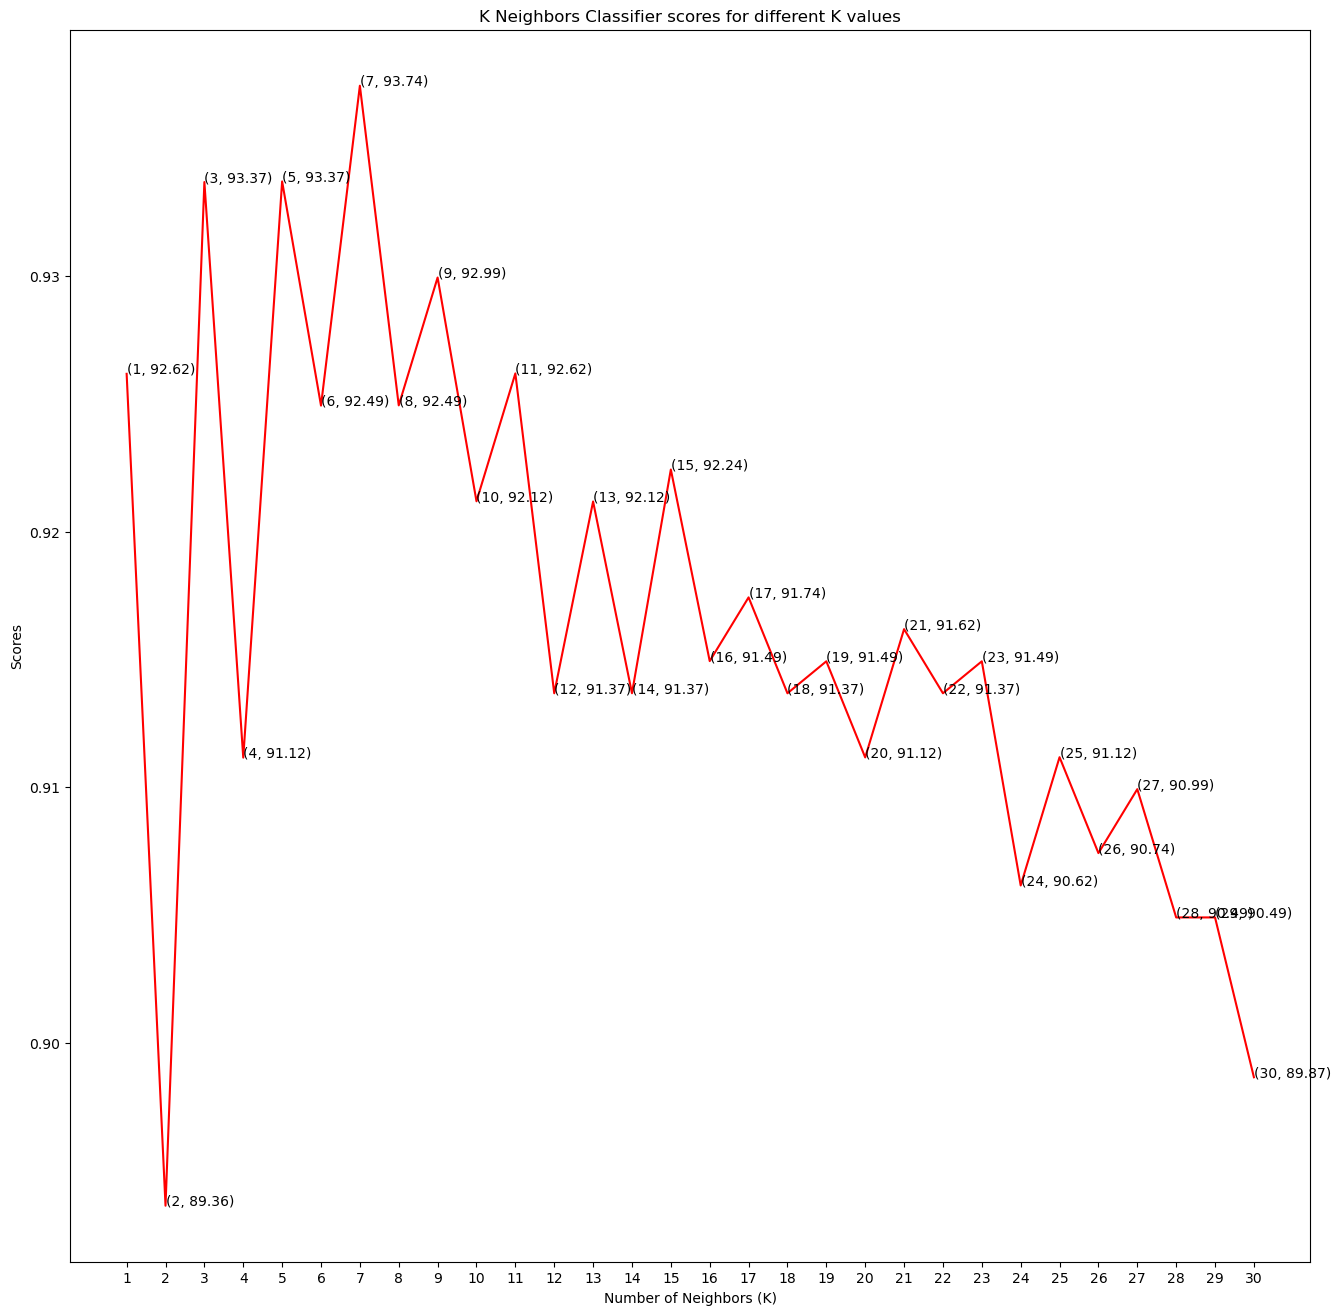

In [26]:
plt.figure(figsize=(16,16))
plt.plot([k for k in range(1, 31)], knn_scores, color = 'red')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [42]:
print('Accuracy score on Train data: {}'.format(knn_scores[4]*100))

Accuracy score on Train data: 73.96619496855345


In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4)
pipe = make_pipeline(col_trans,knn_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test Data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test Data: 69.5


##### c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (5 marks) 

### 3. Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    pipe = make_pipeline(col_trans,dt_classifier)
    dt_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

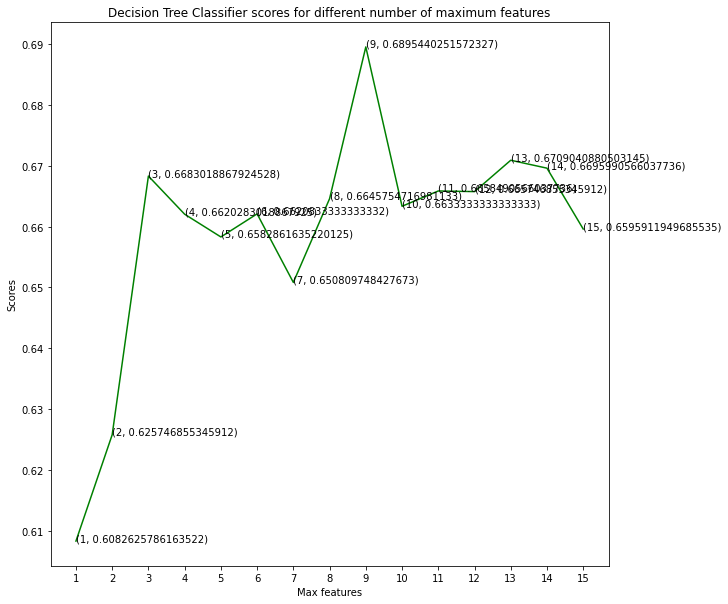

In [45]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [46]:
print('Accuracy score on Train data: {}'.format(dt_scores[3]*100))

Accuracy score on Train data: 66.20283018867926


In [47]:
dt_classifier = DecisionTreeClassifier(max_features = 4, random_state = 0)
pipe = make_pipeline(col_trans,dt_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy  score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy  score on Test data: 64.5


### 4. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    pipe = make_pipeline(col_trans,rf_classifier)
    rf_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

In [49]:
print('Accuracy score on Train data: {}'.format(rf_scores[4]*100))

Accuracy score on Train data: 77.97169811320754


In [50]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)
pipe = make_pipeline(col_trans,rf_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test data: 79.5


##### d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (5 marks)

Random Forest performed well compared with other models. Let's run our model using Random Forest and have a look at its confusion matrix

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    pipe = make_pipeline(col_trans,rf_classifier)
    rf_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

In [52]:
print('Accuracy score on Train data: {}'.format(rf_scores[4]*100))

Accuracy score on Train data: 77.97169811320754


In [53]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)
pipe = make_pipeline(col_trans,rf_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test data: 79.5


Let's take a look at confusion matrix in out testing dataset

In [54]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0   1  All
True                   
0          108  10  118
1           31  51   82
All        139  61  200


In [55]:
# Checking False Negative Rate
10/118

0.0847457627118644

8.47% of observations in testing data are misclassified as Benign

##### b.	What is the overall Accuracy? Please comment on whether it is good or not.  (3 mark)

### Precision, Recall and F1 Score

In [56]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision Score: {}'.format(precision_score(y_test,y_pred)));
print('Recall Score: {}'.format(recall_score(y_test,y_pred)))
print('F1 Score: {}'.format(f1_score(y_test,y_pred)))

Precision Score: 0.8360655737704918
Recall Score: 0.6219512195121951
F1 Score: 0.7132867132867133


### Average Precision Score

In [57]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.67


### ROC-AUC Score

In [58]:
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Score: 0.7686027284001654


### ROC Curve

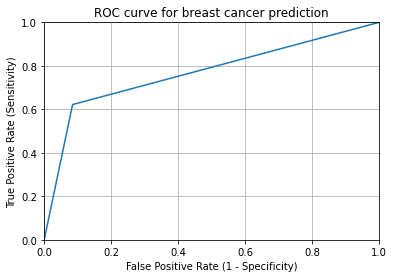

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

##### e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (2 marks)

You can improve the performance of the model to some more extent by performing Hyper parameter tuning in KNN, Random forest, etc.
